# Growth Rates

In [41]:
from patsy import dmatrices
import pandas as pd
import seaborn as sns
import statsmodels.api as sma
import statsmodels as sm
import matplotlib.pyplot as plt
import numpy as np
sns.set()

Datasets were simulated using the script "Simulate no test delays.py".

In [42]:
# Data Import
phase1 = pd.read_excel("../../Data/Exit Strategy/phase1.xlsx")
phase2_scenario1 = pd.read_excel("../../Data/Exit Strategy/phase2_scenario1.xlsx")
phase2_scenario2 = pd.read_excel("../../Data/Exit Strategy/phase2_scenario2.xlsx")
phase3 = pd.read_excel("../../Data/Exit Strategy/phase3.xlsx")
phase4 = pd.read_excel("../../Data/Exit Strategy/phase4.xlsx")

In [43]:
# The infection count columnss
infection_counts = [str(i) for i in range(25)]

## Model fitting to the data
Uses our standard approach to estimate the growth rate.

In [44]:
def estimate_growth_rates(data_in, days_to_use = 20):
    """
    Input the infection counts of the data
    
    Returns the dataframe with the estimated growth rates attached
    """
    
    infection_counts = [str(i) for i in range(days_to_use)]
    
    data_subset = data_in[infection_counts]
    
    growth_rates = []
    
    for _ in range(data_in.shape[0]):
        
        # Print the current progress
        print(f"current fit; {_}", end = "\r")

        # Difference the data and log it
        log_diff = data_subset.iloc[_].diff(1).apply(lambda x: np.log(x))

        # Set up a dictionary to create the dataframe
        data_set_up = {
            "log_case_incidence": log_diff[10:days_to_use],
            "time": list(range(10, days_to_use))
        }
        dataframe = pd.DataFrame(data_set_up)

        # Linear model fitting
        y, X = dmatrices('log_case_incidence ~ time', 
                         data = dataframe)
        model = sma.RLM(y, X)
        res = model.fit()
        growth_rates.append(res.params[1])

        #fig = sm.graphics.regressionplots.plot_fit(res, 1)

        if res.params[1] == -float("inf"):
            print(f"missing data in line {_}")

    growth_rate_series = pd.Series(growth_rates)
    data_in["growth_rate"] = growth_rate_series
    
    return data_in

In [45]:
phase1 = estimate_growth_rates(phase1)
phase2_scenario1 = estimate_growth_rates(phase2_scenario1)
phase2_scenario2 = estimate_growth_rates(phase2_scenario2)
phase3 = estimate_growth_rates(phase3)
phase4 = estimate_growth_rates(phase4)

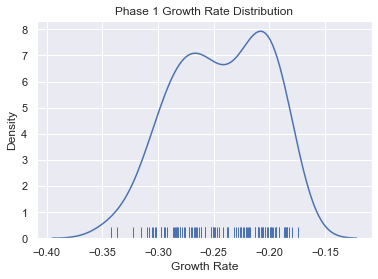

In [46]:
sns.distplot(phase1["growth_rate"], hist = False, rug = True)
plt.title("Phase 1 Growth Rate Distribution")
plt.xlabel("Growth Rate")
plt.ylabel("Density")
plt.savefig("../../Figures/Exit Strategy/phase1.svg")

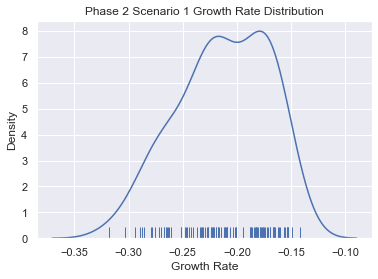

In [47]:
sns.distplot(phase2_scenario1["growth_rate"], hist = False, rug = True)
plt.title("Phase 2 Scenario 1 Growth Rate Distribution")
plt.xlabel("Growth Rate")
plt.ylabel("Density")
plt.savefig("../../Figures/Exit Strategy/phase2_scenario1.svg")

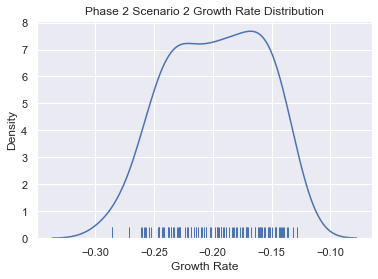

In [48]:
sns.distplot(phase2_scenario2["growth_rate"], hist = False, rug = True)
plt.title("Phase 2 Scenario 2 Growth Rate Distribution")
plt.xlabel("Growth Rate")
plt.ylabel("Density")
plt.savefig("../../Figures/Exit Strategy/phase2_scenario2.svg")

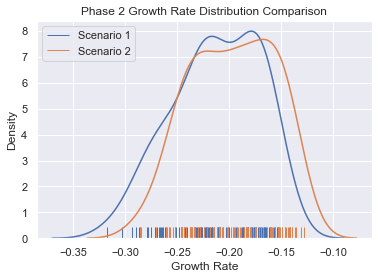

In [49]:
sns.distplot(phase2_scenario1["growth_rate"], hist = False, rug = True)
plt.title("Phase 2 Growth Rate Distribution Comparison")
sns.distplot(phase2_scenario2["growth_rate"], hist = False, rug = True)
plt.xlabel("Growth Rate")
plt.ylabel("Density")
plt.legend(("Scenario 1", "Scenario 2"))
plt.savefig("../../Figures/Exit Strategy/phase2_comparison.svg")

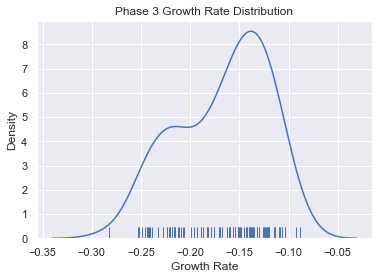

In [50]:
sns.distplot(phase3["growth_rate"], hist = False, rug = True)
plt.title("Phase 3 Growth Rate Distribution")
plt.xlabel("Growth Rate")
plt.ylabel("Density")
plt.savefig("../../Figures/Exit Strategy/phase3.svg")

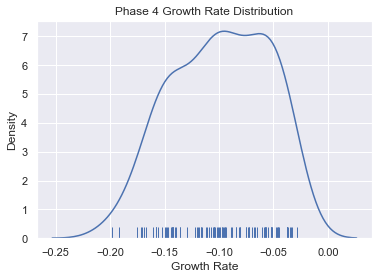

In [51]:
sns.distplot(phase4["growth_rate"], hist = False, rug = True)
plt.title("Phase 4 Growth Rate Distribution")
plt.xlabel("Growth Rate")
plt.ylabel("Density")
plt.savefig("../../Figures/Exit Strategy/phase4.svg")

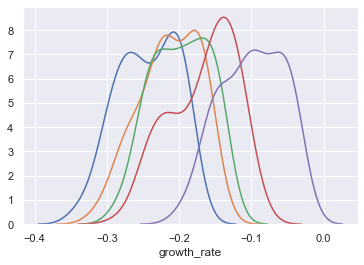

In [52]:
sns.distplot(phase1["growth_rate"], hist = False)
#plt.legend(["Phase 1", "Phase 2 Scenario 1"])
sns.distplot(phase2_scenario1["growth_rate"], hist = False)
sns.distplot(phase2_scenario2["growth_rate"], hist = False)
sns.distplot(phase3["growth_rate"], hist = False)
sns.distplot(phase4["growth_rate"], hist = False)